In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

# 54.5

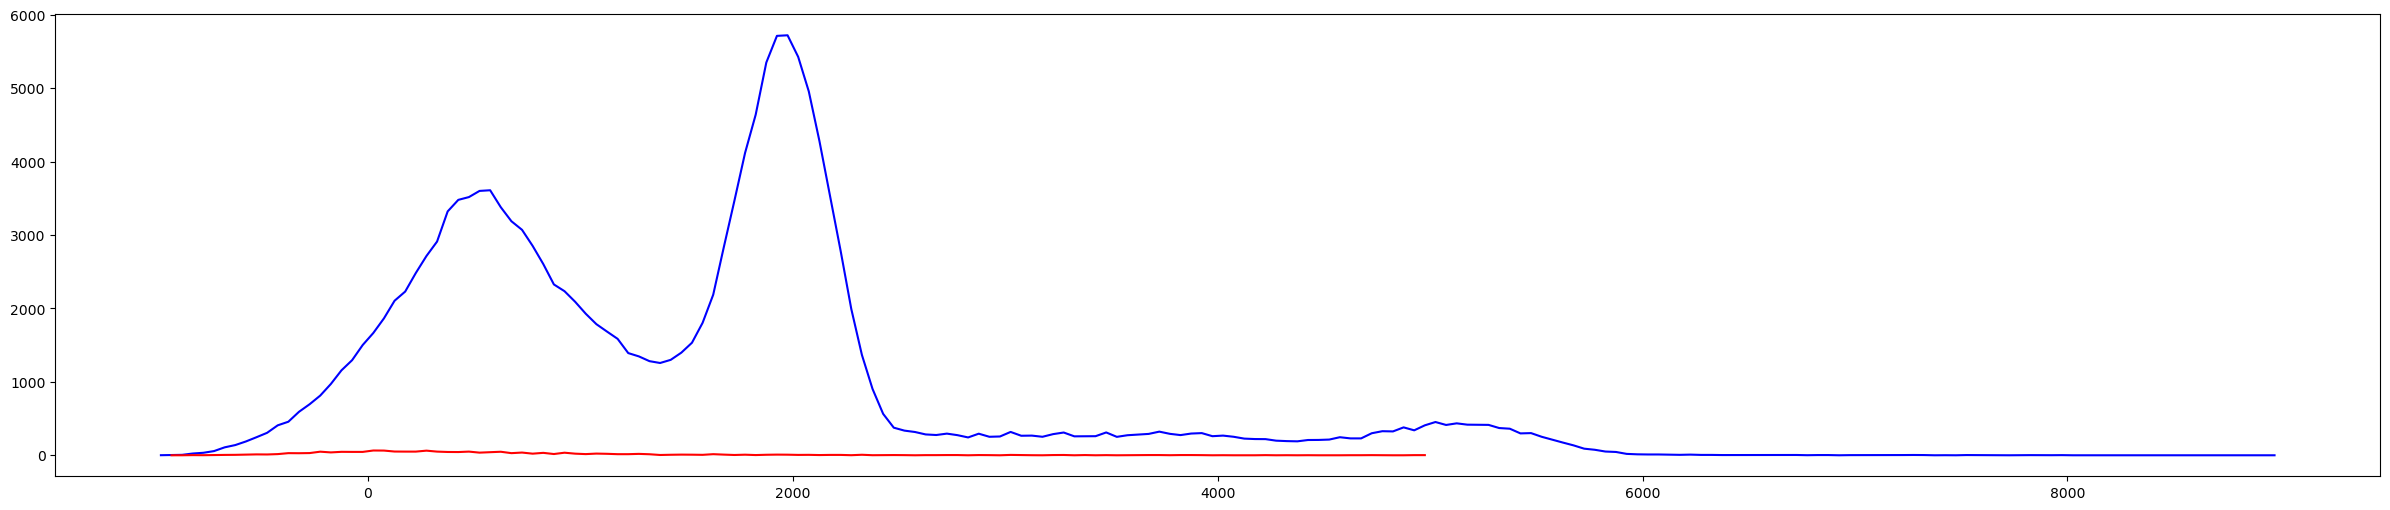

In [28]:
#prendo i dati
df = pd.read_csv('/home/matti/uni/lab/Laboratorio_SiPM/Dati/Parte 2/Spettro BGO/Na_54.5_th-20(vecchio).txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('/home/matti/uni/lab/Laboratorio_SiPM/Dati/Parte 2/Spettro BGO/Bg_54.5_th-20(vecchio).txt', delim_whitespace = 'True', header = None, skiprows = 146, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.plot(df['ADC'], df['Counts'], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'], df_bkg['Counts'], label = 'Spettro di fondo', color = 'red')

In [29]:
print(len(df['ADC']), len(df_bkg['ADC']))

200 119
